In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from corpgame import PolymatrixGame

def draw_3player_states(payoff, pne):
    ''' Works only for 3 players! '''
    G= nx.DiGraph()
    for key in payoff:
        G.add_node(key)
    pos = {'000': [0, 0], 
           '100': [0.5,0],
           '010': [0, 0.5], 
           '110': [0.5,0.5], 
           '001': [0.3,0.3], 
           '011': [0.3,0.8], 
           '101': [0.8,0.3], 
           '111': [0.8,0.8]
          }
    node_colors = []
    for key in payoff:
        if key in pne:
            node_colors.append([0.3,1,1])
        else:
            node_colors.append([1,1,1])
    nx.draw_networkx_nodes(G, pos,
                           #nodelist=[0, 1, 2, 3],
                           node_color=node_colors,#[[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0.3,1,1],[1,1,1],[0,0,0]],#'w',
                           node_size=2500,
                           alpha=0.8)
    labels = {}
    for i, key in enumerate(payoff):
        labels[key] = key+'\n'+str([int(i) for i in payoff[key]])
    nx.draw_networkx_labels(G, pos, labels, font_size=10)
    
    #for each strategy, check if outgoing improves. If so, add edge
    for i, profile in enumerate(payoff):
        for j, strategy in enumerate(profile):
            deviation = list(profile)
            deviation[j] = str(1-int(strategy))
            deviation = ''.join(deviation)
            if payoff[profile][j]>payoff[deviation][j]:
                #print(j, profile, payoff[profile], deviation, payoff[deviation])
                G.add_edge(deviation,profile,player=j)

    cmap = {0: 'r', 1: 'g', 2: 'b'}

    for edge in G.edges():
        player = G[edge[0]][edge[1]]['player']
        #print(edge, cmap[player])
        nx.draw_networkx_edges(G, pos,
                           edgelist=[edge],
                               arrows=True,
                           width=12, edge_color=cmap[player],
                              style='dashed')

    plt.axis('off')
    plt.show()

{'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}


C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


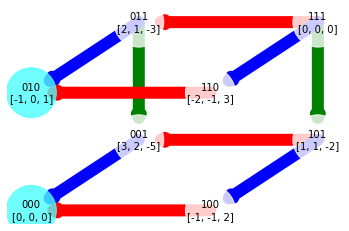

In [2]:

game_settings = {
        "start_populations_matrix": [[4,4],[2,6],[10,0]],
        "topology": "fully_connected",
        'alpha': 1.0,
        'log_level': "error",
    'player_labels':[1,2,3]
    }
game = PolymatrixGame(**game_settings)
game.solve()
print(game.pne)
draw_3player_states(game.payoffs, game.pne)

[array([4., 4.]), array([2., 6.]), array([10.,  0.])]

In [4]:
from itertools import product
strategies = [p for p in product([0,1], repeat = 3)]
strategies2 = [p for p in product([0,1], repeat = 3)]
for s1 in strategies:
    game_settings = {
            "start_populations_matrix": [[4,4],[2,6],[10,0]],
            "topology": "fully_connected",
            'alpha': 1.0,
            'log_level': "error",
        'player_labels':[1,2,3]
        }
    game = PolymatrixGame(**game_settings)
    game.play(list(s1))
    game.solve()
    state = list(game.state)
    print(s1, game.pne)
    for s2 in strategies:
        game_settings['start_populations_matrix'] = state
        game = PolymatrixGame(**game_settings)
        game.play(s2)
        game.solve()
        state2 = list(game.state)
        print(s1,s2, game.pne)
        for s3 in strategies:
            game_settings['start_populations_matrix'] = state2
            game = PolymatrixGame(**game_settings)
            game.play(s3)
            game.solve()
            state3 = list(game.state)
            print(s1,s2,s3, game.pne)
            for s4 in strategies:
                game_settings['start_populations_matrix'] = state3
                game = PolymatrixGame(**game_settings)
                game.play(s4)
                game.solve()
                print(s1,s2,s3, s4, game.pne)

(0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 1) {'001': [-1.0, -1.5, 2.5]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 1, 0) {'010': [-1.0, 1.0, 0.0]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (1, 0, 0) {'100': [1.5, -1.5, 0.0]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (1, 1, 0) {'110': [-1.0, -0.5, 1.5]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (1, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (0, 0, 0) (0, 0, 1) {'001': [-1.0, -1.5, 2.5]}
(0, 0, 0) (0, 0, 0) (0, 0, 1) (0, 0, 0) {'001': [-1.0, -1.5, 2.5]}
(0, 0, 0) (0, 0, 0) (0, 0, 1) (0, 0, 1) {'001': [-0.5, -0.75, 1.2

(0, 0, 0) (0, 0, 1) (1, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (0, 0, 0) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (0, 1, 0) {'010': [-0.875, 2.5, -1.625]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (0, 1, 1) {'001': [0.0, -0.875, 0.875]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (1, 0, 0) {'101': [0.0, 1.125, -1.125]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (1, 0, 1) {'101': [-1.125, 1.125, 0.0]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (1, 1, 1) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 0) (0, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 0) (0, 0, 1) (1, 1, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 0) (0, 0, 1) (1, 1, 0) (0, 0, 1) {'001': [-1.125, -1.375, 2.5]}
(0, 0, 0) (0, 0, 1) (1, 1, 0) (0, 1, 0) {'010': [-1.125, 1.125, 0.0]}
(0, 0, 0) (0, 0, 1) (1, 1, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(0, 0, 0) (0, 0, 1) (1, 1, 0) (1, 0, 0) {'100': [1.375, -1.375, 

(0, 0, 0) (0, 1, 1) (0, 1, 1) (0, 1, 0) {'010': [0.0, 0.5, -0.5]}
(0, 0, 0) (0, 1, 1) (0, 1, 1) (0, 1, 1) {'011': [0.75, -0.125, -0.625]}
(0, 0, 0) (0, 1, 1) (0, 1, 1) (1, 0, 0) {'100': [2.5, -2.0, -0.5]}
(0, 0, 0) (0, 1, 1) (0, 1, 1) (1, 0, 1) {'001': [-1.375, 0.625, 0.75]}
(0, 0, 0) (0, 1, 1) (0, 1, 1) (1, 1, 0) {'010': [-0.375, 0.25, 0.125]}
(0, 0, 0) (0, 1, 1) (0, 1, 1) (1, 1, 1) {'010': [0.25, 0.5, -0.75]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) {'100': [2.5, -2.0, -0.5]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) (0, 0, 0) {'100': [2.5, -2.0, -0.5]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) (0, 0, 1) {'001': [-1.25, -1.0, 2.25]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) (0, 1, 0) {'010': [-1.25, 1.5, -0.25], '110': [-1.25, 0.25, 1.0]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) (1, 0, 0) {'100': [1.25, -1.0, -0.25]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) (1, 0, 1) {'100': [1.5, 0.0, -1.5]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) (1, 1, 0) {'110': [0.0, -1.5, 1.5]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) 

(0, 0, 0) (1, 0, 1) (0, 0, 1) (0, 0, 0) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 0) (1, 0, 1) (0, 0, 1) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(0, 0, 0) (1, 0, 1) (0, 0, 1) (0, 1, 0) {'010': [-0.875, 2.5, -1.625]}
(0, 0, 0) (1, 0, 1) (0, 0, 1) (0, 1, 1) {'001': [0.0, -0.875, 0.875]}
(0, 0, 0) (1, 0, 1) (0, 0, 1) (1, 0, 0) {'101': [0.0, 1.125, -1.125]}
(0, 0, 0) (1, 0, 1) (0, 0, 1) (1, 0, 1) {'101': [-1.125, 1.125, 0.0]}
(0, 0, 0) (1, 0, 1) (0, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 0) (1, 0, 1) (0, 0, 1) (1, 1, 1) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 0) (1, 0, 1) (0, 1, 0) {'010': [-1.75, 2.5, -0.75]}
(0, 0, 0) (1, 0, 1) (0, 1, 0) (0, 0, 0) {'010': [-1.75, 2.5, -0.75]}
(0, 0, 0) (1, 0, 1) (0, 1, 0) (0, 0, 1) {'001': [-0.875, -1.25, 2.125]}
(0, 0, 0) (1, 0, 1) (0, 1, 0) (0, 1, 0) {'010': [-0.875, 1.25, -0.375]}
(0, 0, 0) (1, 0, 1) (0, 1, 0) (0, 1, 1) {'010': [0.0, 1.625, -1.625]}
(0, 0, 0) (1, 0, 1) (0, 1, 0) (1, 0, 0) {'100': [1.625, -1.25, -0.375], '110': [0.375, -1.25, 0.875]}
(0, 

(0, 0, 0) (1, 1, 0) (1, 1, 1) (0, 0, 0) {'110': [-1.0, -0.5, 1.5]}
(0, 0, 0) (1, 1, 0) (1, 1, 1) (0, 0, 1) {'001': [-1.0, -1.5, 2.5]}
(0, 0, 0) (1, 1, 0) (1, 1, 1) (0, 1, 0) {'010': [-1.0, 1.0, 0.0]}
(0, 0, 0) (1, 1, 0) (1, 1, 1) (0, 1, 1) {'010': [0.25, 0.5, -0.75]}
(0, 0, 0) (1, 1, 0) (1, 1, 1) (1, 0, 0) {'110': [0.0, -1.0, 1.0]}
(0, 0, 0) (1, 1, 0) (1, 1, 1) (1, 0, 1) {'100': [0.5, 0.5, -1.0]}
(0, 0, 0) (1, 1, 0) (1, 1, 1) (1, 1, 0) {'110': [-0.5, -0.25, 0.75]}
(0, 0, 0) (1, 1, 0) (1, 1, 1) (1, 1, 1) {'110': [-1.0, -0.5, 1.5]}
(0, 0, 0) (1, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (1, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (1, 1, 1) (0, 0, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (1, 1, 1) (0, 0, 0) (0, 0, 1) {'001': [-1.0, -1.5, 2.5]}
(0, 0, 0) (1, 1, 1) (0, 0, 0) (0, 1, 0) {'010': [-1.0, 1.0, 0.0]}
(0, 0, 0) (1, 1, 1) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(

(0, 0, 1) (0, 0, 0) (1, 0, 0) (1, 1, 0) {'100': [1.375, -1.375, 0.0]}
(0, 0, 1) (0, 0, 0) (1, 0, 0) (1, 1, 1) {'100': [2.0, -0.75, -1.25]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (0, 0, 0) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (0, 1, 0) {'010': [-0.875, 2.5, -1.625]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (0, 1, 1) {'001': [0.0, -0.875, 0.875]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (1, 0, 0) {'101': [0.0, 1.125, -1.125]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (1, 0, 1) {'101': [-1.125, 1.125, 0.0]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (1, 1, 1) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 1) (0, 0, 0) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 1) (0, 0, 0) (1, 1, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 1) (0, 0, 0) (1, 1, 0) (0, 0, 1) {'001': [-1.125, -1.375, 2.5]}
(0, 0, 1) (0, 0, 0) (1, 1, 0) (0, 1, 0) {'010': [-1.125, 1.1

(0, 0, 1) (0, 1, 0) (0, 1, 0) {'010': [-0.25, 0.875, -0.625]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (0, 0, 0) {'010': [-0.25, 0.875, -0.625]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (0, 0, 1) {'011': [0.625, -0.75, 0.125]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (0, 1, 0) {'010': [-0.125, 0.4375, -0.3125]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (0, 1, 1) {'010': [0.0, 0.75, -0.75]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (1, 0, 0) {'100': [2.375, -2.0625, -0.3125]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (1, 0, 1) {'001': [-1.4375, 0.875, 0.5625]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (1, 1, 0) {'010': [-0.5625, 0.5625, 0.0]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (1, 1, 1) {'010': [-0.25, 0.875, -0.625]}
(0, 0, 1) (0, 1, 0) (0, 1, 1) {'011': [0.875, 0.0, -0.875]}
(0, 0, 1) (0, 1, 0) (0, 1, 1) (0, 0, 0) {'011': [0.875, 0.0, -0.875]}
(0, 0, 1) (0, 1, 0) (0, 1, 1) (0, 0, 1) {'011': [0.4375, -0.4375, 0.0]}
(0, 0, 1) (0, 1, 0) (0, 1, 1) (0, 1, 0) {'010': [0.0, 0.75, -0.75]}
(0, 0, 1) (0, 1, 0) (0, 1, 1) (0, 1, 1) {'011': [0.4375, 0.0, -0.4375]}
(0, 0, 1) (0, 1, 

(0, 0, 1) (0, 1, 1) (1, 1, 1) (0, 1, 0) {'011': [0.875, 0.0, -0.875]}
(0, 0, 1) (0, 1, 1) (1, 1, 1) (0, 1, 1) {'011': [0.875, -0.875, 0.0]}
(0, 0, 1) (0, 1, 1) (1, 1, 1) (1, 0, 0) {'100': [2.5, -1.0, -1.5]}
(0, 0, 1) (0, 1, 1) (1, 1, 1) (1, 0, 1) {'001': [-1.0, 0.0, 1.0]}
(0, 0, 1) (0, 1, 1) (1, 1, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 1) (0, 1, 1) (1, 1, 1) (1, 1, 1) {'011': [1.75, -1.75, 0.0]}
(0, 0, 1) (1, 0, 0) {'100': [2.0, -0.75, -1.25]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) {'100': [2.0, -0.75, -1.25]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) (0, 0, 0) {'100': [2.0, -0.75, -1.25]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) (0, 0, 1) {'101': [-0.75, 0.375, 0.375]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) (0, 1, 0) {'010': [-1.5, 2.125, -0.625]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0], '001': [1.125, -1.125, 0.0]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) (1, 0, 0) {'100': [1.0, -0.375, -0.625]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) (1, 0, 1) {'101': [0.0, 1.125, -1.125]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) (1, 1, 0) 

(0, 0, 1) (1, 0, 1) (1, 0, 0) (0, 0, 1) {'101': [-0.5625, 0.5625, 0.0]}
(0, 0, 1) (1, 0, 1) (1, 0, 0) (0, 1, 0) {'010': [-1.6875, 2.5, -0.8125]}
(0, 0, 1) (1, 0, 1) (1, 0, 0) (0, 1, 1) {'001': [0.5625, -1.125, 0.5625]}
(0, 0, 1) (1, 0, 1) (1, 0, 0) (1, 0, 0) {'100': [0.8125, 0.0, -0.8125]}
(0, 0, 1) (1, 0, 1) (1, 0, 0) (1, 0, 1) {'101': [0.0, 0.5625, -0.5625]}
(0, 0, 1) (1, 0, 1) (1, 0, 0) (1, 1, 0) {'100': [0.8125, -0.8125, 0.0]}
(0, 0, 1) (1, 0, 1) (1, 0, 0) (1, 1, 1) {'101': [0.0, 1.125, -1.125]}
(0, 0, 1) (1, 0, 1) (1, 0, 1) {'101': [-1.125, 1.125, 0.0]}
(0, 0, 1) (1, 0, 1) (1, 0, 1) (0, 0, 0) {'101': [-1.125, 1.125, 0.0]}
(0, 0, 1) (1, 0, 1) (1, 0, 1) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(0, 0, 1) (1, 0, 1) (1, 0, 1) (0, 1, 0) {'010': [-0.875, 2.5, -1.625]}
(0, 0, 1) (1, 0, 1) (1, 0, 1) (0, 1, 1) {'001': [0.0, -0.875, 0.875]}
(0, 0, 1) (1, 0, 1) (1, 0, 1) (1, 0, 0) {'101': [0.0, 0.5625, -0.5625]}
(0, 0, 1) (1, 0, 1) (1, 0, 1) (1, 0, 1) {'101': [-0.5625, 0.5625, 0.0]}
(0, 0, 1) 

(0, 0, 1) (1, 1, 1) (0, 1, 0) (0, 1, 1) {'011': [0.875, 0.0, -0.875]}
(0, 0, 1) (1, 1, 1) (0, 1, 0) (1, 0, 0) {'100': [2.25, -1.625, -0.625]}
(0, 0, 1) (1, 1, 1) (0, 1, 0) (1, 0, 1) {'001': [-1.25, 0.875, 0.375]}
(0, 0, 1) (1, 1, 1) (0, 1, 0) (1, 1, 0) {'010': [-1.125, 1.125, 0.0]}
(0, 0, 1) (1, 1, 1) (0, 1, 0) (1, 1, 1) {'010': [-0.5, 1.75, -1.25], '011': [0.75, 0.5, -1.25]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) {'011': [1.75, -1.75, 0.0]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (0, 0, 0) {'011': [1.75, -1.75, 0.0]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (0, 0, 1) {'001': [0.0, -1.0, 1.0]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (0, 1, 0) {'011': [0.875, 0.0, -0.875]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (0, 1, 1) {'011': [0.875, -0.875, 0.0]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (1, 0, 0) {'100': [2.5, -1.0, -1.5]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (1, 0, 1) {'001': [-1.0, 0.0, 1.0]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (1, 1, 1) {'011': [1.75, -1.75, 0.0]}
(0, 0, 1) (1, 1, 1) (1,

(0, 1, 0) (0, 0, 1) (0, 0, 0) (0, 1, 1) {'011': [1.375, -1.375, 0.0]}
(0, 1, 0) (0, 0, 1) (0, 0, 0) (1, 0, 0) {'100': [2.25, -1.0, -1.25]}
(0, 1, 0) (0, 0, 1) (0, 0, 0) (1, 0, 1) {'001': [-1.5, 0.0, 1.5]}
(0, 1, 0) (0, 0, 1) (0, 0, 0) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 0) (0, 0, 1) (0, 0, 0) (1, 1, 1) {'001': [-0.5, -2.0, 2.5]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) {'001': [-0.25, -1.0, 1.25]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (0, 0, 0) {'001': [-0.25, -1.0, 1.25]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (0, 0, 1) {'001': [-0.125, -0.5, 0.625]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (0, 1, 0) {'011': [1.125, 0.125, -1.25]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (0, 1, 1) {'001': [0.0, -1.125, 1.125]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (1, 0, 0) {'100': [2.375, -0.5, -1.875]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (1, 0, 1) {'001': [-0.75, 0.0, 0.75]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (1, 1, 1) {'001': [-0.25, -1.0, 1.25]}
(0, 1, 0) (0, 0, 1) (0, 1, 0) {'011': [0.875, 0.25

(0, 1, 0) (0, 1, 0) (1, 1, 0) (0, 1, 0) {'010': [-0.25, 0.25, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 0) (0, 1, 1) {'010': [0.0, 0.25, -0.25]}
(0, 1, 0) (0, 1, 0) (1, 1, 0) (1, 0, 0) {'110': [0.0, -0.625, 0.625]}
(0, 1, 0) (0, 1, 0) (1, 1, 0) (1, 0, 1) {'100': [1.0, 0.625, -1.625]}
(0, 1, 0) (0, 1, 0) (1, 1, 0) (1, 1, 0) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 0) (1, 1, 1) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (0, 0, 0) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (0, 0, 1) {'001': [-0.25, -2.25, 2.5]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (0, 1, 0) {'010': [-0.25, 0.25, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (0, 1, 1) {'010': [0.0, 0.25, -0.25]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (1, 0, 0) {'110': [0.0, -1.25, 1.25]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (1, 1, 0) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (1, 1, 1) {'010': [-0.5, 0.5, 0.0]}


(0, 1, 0) (1, 0, 0) (0, 1, 1) (1, 1, 0) {'010': [-0.4375, 0.125, 0.3125]}
(0, 1, 0) (1, 0, 0) (0, 1, 1) (1, 1, 1) {'010': [0.625, 0.25, -0.875]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) {'100': [1.0, -1.0, 0.0]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (0, 0, 0) {'100': [1.0, -1.0, 0.0]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (0, 0, 1) {'001': [-2.0, -0.5, 2.5]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (0, 1, 0) {'110': [-0.625, 0.0, 0.625]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (0, 1, 1) {'010': [0.625, 0.75, -1.375]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (1, 0, 0) {'100': [0.5, -0.5, 0.0]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (1, 0, 1) {'100': [0.5, 0.0, -0.5]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (1, 1, 0) {'110': [0.0, -0.625, 0.625]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (1, 1, 1) {'100': [1.0, -1.0, 0.0]}
(0, 1, 0) (1, 0, 0) (1, 0, 1) {'100': [1.0, 0.0, -1.0]}
(0, 1, 0) (1, 0, 0) (1, 0, 1) (0, 0, 0) {'100': [1.0, 0.0, -1.0]}
(0, 1, 0) (1, 0, 0) (1, 0, 1) (0, 0, 1) {'101': [-1.6875, 1.6875, 0.0]}
(0, 1, 0) (1, 0, 0) (1, 0, 1) (0, 1, 0) {'110': [-1.8125, 0.5, 

(0, 1, 0) (1, 1, 0) (0, 0, 1) (0, 0, 1) {'001': [-0.25, -1.0, 1.25]}
(0, 1, 0) (1, 1, 0) (0, 0, 1) (0, 1, 0) {'010': [-0.25, 1.5, -1.25]}
(0, 1, 0) (1, 1, 0) (0, 0, 1) (0, 1, 1) {'011': [1.6875, -1.6875, 0.0]}
(0, 1, 0) (1, 1, 0) (0, 0, 1) (1, 0, 0) {'100': [2.25, -1.0, -1.25]}
(0, 1, 0) (1, 1, 0) (0, 0, 1) (1, 0, 1) {'001': [-1.5, 0.0, 1.5]}
(0, 1, 0) (1, 1, 0) (0, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 0) (1, 1, 0) (0, 0, 1) (1, 1, 1) {'001': [-0.5, -2.0, 2.5]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) (0, 0, 0) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) (0, 0, 1) {'001': [-0.25, -2.25, 2.5]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) (0, 1, 0) {'010': [-0.25, 0.25, 0.0]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) (0, 1, 1) {'010': [0.0, 0.25, -0.25]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) (1, 0, 0) {'110': [0.0, -0.625, 0.625]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) (1, 0, 1) {'100': [1.0, 0.625, -1.625]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) (1, 1, 0) {'010': [-0.5, 0

(0, 1, 0) (1, 1, 1) (1, 1, 0) (1, 1, 0) {'110': [-0.625, 0.0, 0.625]}
(0, 1, 0) (1, 1, 1) (1, 1, 0) (1, 1, 1) {'010': [-1.0, 1.0, 0.0]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) {'010': [-1.0, 1.0, 0.0]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (0, 0, 0) {'010': [-1.0, 1.0, 0.0]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (0, 0, 1) {'001': [-0.5, -2.0, 2.5]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (0, 1, 0) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (0, 1, 1) {'010': [0.0, 0.5, -0.5]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (1, 0, 0) {'110': [0.0, -1.25, 1.25]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (1, 1, 0) {'010': [-1.0, 1.0, 0.0]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (1, 1, 1) {'010': [-1.0, 1.0, 0.0]}
(0, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(0, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(0, 1, 1) (0, 0, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(0, 1, 1) (0, 0, 0) (0, 0, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '01

(0, 1, 1) (0, 0, 1) (1, 0, 0) (0, 0, 0) {'100': [2.5, -1.0, -1.5]}
(0, 1, 1) (0, 0, 1) (1, 0, 0) (0, 0, 1) {'101': [-1.0625, 0.5625, 0.5]}
(0, 1, 1) (0, 0, 1) (1, 0, 0) (0, 1, 0) {'010': [-1.25, 2.0, -0.75]}
(0, 1, 1) (0, 0, 1) (1, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (0, 0, 1) (1, 0, 0) (1, 0, 0) {'100': [1.25, -0.5, -0.75]}
(0, 1, 1) (0, 0, 1) (1, 0, 0) (1, 0, 1) {'101': [0.0, 1.5625, -1.5625]}
(0, 1, 1) (0, 0, 1) (1, 0, 0) (1, 1, 0) {'100': [1.75, -1.75, 0.0]}
(0, 1, 1) (0, 0, 1) (1, 0, 0) (1, 1, 1) {'100': [2.5, -1.0, -1.5]}
(0, 1, 1) (0, 0, 1) (1, 0, 1) {'001': [-1.0, 0.0, 1.0]}
(0, 1, 1) (0, 0, 1) (1, 0, 1) (0, 0, 0) {'001': [-1.0, 0.0, 1.0]}
(0, 1, 1) (0, 0, 1) (1, 0, 1) (0, 0, 1) {'001': [-0.5, 0.0, 0.5]}
(0, 1, 1) (0, 0, 1) (1, 0, 1) (0, 1, 0) {'011': [1.4375, 0.5, -1.9375]}
(0, 1, 1) (0, 0, 1) (1, 0, 1) (0, 1, 1) {'001': [0.0, -0.5, 0.5]}
(0, 1, 1) (0, 0, 1) (1, 0, 1) (1, 0, 0) {'101': [0.0, 1.5625, -1.5625]}
(0, 1, 1) (0, 0, 1) (1, 0, 1) (1, 0, 1) {'001': [-1.0

(0, 1, 1) (0, 1, 1) (0, 1, 0) (0, 1, 1) {'010': [0.0, 0.5, -0.5]}
(0, 1, 1) (0, 1, 1) (0, 1, 0) (1, 0, 0) {'100': [2.5, -2.25, -0.25]}
(0, 1, 1) (0, 1, 1) (0, 1, 0) (1, 0, 1) {'001': [-1.5625, 0.6875, 0.875]}
(0, 1, 1) (0, 1, 1) (0, 1, 0) (1, 1, 0) {'010': [-0.25, 0.25, 0.0]}
(0, 1, 1) (0, 1, 1) (0, 1, 0) (1, 1, 1) {'010': [0.0, 0.5, -0.5]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) {'011': [0.75, -0.125, -0.625]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (0, 0, 0) {'011': [0.75, -0.125, -0.625]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (0, 0, 1) {'011': [0.4375, -0.4375, 0.0]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (0, 1, 0) {'010': [0.0, 0.5, -0.5]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (0, 1, 1) {'011': [0.375, -0.0625, -0.3125]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (1, 0, 0) {'100': [2.5, -2.0, -0.5]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (1, 0, 1) {'001': [-1.6875, 0.3125, 1.375]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (1, 1, 0) {'010': [-0.4375, 0.375, 0.0625]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (1, 1, 1) {'011': [0.75, -0.125, -0.625]}
(0, 1, 1) (0, 1, 1) (1,

(0, 1, 1) (1, 0, 0) (1, 1, 1) (1, 0, 1) {'100': [1.5, 0.0, -1.5]}
(0, 1, 1) (1, 0, 0) (1, 1, 1) (1, 1, 0) {'110': [0.0, -1.5, 1.5]}
(0, 1, 1) (1, 0, 0) (1, 1, 1) (1, 1, 1) {'100': [2.5, -2.0, -0.5]}
(0, 1, 1) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (0, 0, 1) {'001': [-1.0, 0.0, 1.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (0, 1, 0) {'010': [-1.0, 2.5, -1.5]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (1, 0, 0) {'100': [1.5, 0.0, -1.5]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (1, 0, 1) {'101': [-1.25, 1.875, -0.625]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 1) {'001': [-1.0, 0.0, 1.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 1) (0, 0, 0) {'001': [-1.0, 0.0, 1.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 1) (0, 0, 1) {'001': 

(0, 1, 1) (1, 1, 0) (1, 0, 0) (1, 1, 0) {'110': [0.0, -0.75, 0.75]}
(0, 1, 1) (1, 1, 0) (1, 0, 0) (1, 1, 1) {'110': [0.0, -1.5, 1.5]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (0, 0, 1) {'001': [-1.375, 0.0, 1.375]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (0, 1, 0) {'010': [-1.375, 2.5, -1.125]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (1, 0, 0) {'100': [1.125, 0.0, -1.125]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (1, 0, 1) {'101': [-0.625, 1.9375, -1.3125]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 1, 0) (1, 1, 0) {'010': [-0.375, 0.25, 0.125]}
(0, 1, 1) (1, 1, 0) (1, 1, 0) (0, 0, 0) {'010': [-0.375, 0.25, 0.125]}
(0, 1, 1) (1, 1, 0) (1, 1, 0) (0, 0, 1) {'001': [-0.25, -2.25, 2.5]}
(0, 1, 1) (1, 1, 0) (1, 1, 0) (0, 1, 0) {'010': [-0.25, 0.25, 0.

(1, 0, 0) (0, 0, 0) (0, 1, 0) (0, 0, 1) {'001': [-0.875, -1.625, 2.5]}
(1, 0, 0) (0, 0, 0) (0, 1, 0) (0, 1, 0) {'010': [-0.875, 0.875, 0.0]}
(1, 0, 0) (0, 0, 0) (0, 1, 0) (0, 1, 1) {'010': [0.0, 0.875, -0.875]}
(1, 0, 0) (0, 0, 0) (0, 1, 0) (1, 0, 0) {'110': [0.0, -0.5, 0.5]}
(1, 0, 0) (0, 0, 0) (0, 1, 0) (1, 0, 1) {'100': [0.625, 0.5, -1.125]}
(1, 0, 0) (0, 0, 0) (0, 1, 0) (1, 1, 0) {'110': [-0.5, 0.0, 0.5]}
(1, 0, 0) (0, 0, 0) (0, 1, 0) (1, 1, 1) {'110': [-1.0, 0.0, 1.0]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) (0, 0, 1) {'001': [0.0, -1.625, 1.625]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) (0, 1, 0) {'010': [0.0, 0.875, -0.875]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) (0, 1, 1) {'010': [0.5, 0.75, -1.25]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) (1, 0, 0) {'100': [2.5, -1.625, -0.875]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) (1, 1, 0) {}
(1, 0, 0) (0, 

(1, 0, 0) (0, 1, 0) (0, 0, 0) (0, 0, 1) {'001': [-0.875, -1.625, 2.5]}
(1, 0, 0) (0, 1, 0) (0, 0, 0) (0, 1, 0) {'010': [-0.875, 0.875, 0.0]}
(1, 0, 0) (0, 1, 0) (0, 0, 0) (0, 1, 1) {'010': [0.0, 0.875, -0.875]}
(1, 0, 0) (0, 1, 0) (0, 0, 0) (1, 0, 0) {'110': [0.0, -0.5, 0.5]}
(1, 0, 0) (0, 1, 0) (0, 0, 0) (1, 0, 1) {'100': [0.625, 0.5, -1.125]}
(1, 0, 0) (0, 1, 0) (0, 0, 0) (1, 1, 0) {'110': [-0.5, 0.0, 0.5]}
(1, 0, 0) (0, 1, 0) (0, 0, 0) (1, 1, 1) {'110': [-1.0, 0.0, 1.0]}
(1, 0, 0) (0, 1, 0) (0, 0, 1) {'001': [-0.875, -1.625, 2.5]}
(1, 0, 0) (0, 1, 0) (0, 0, 1) (0, 0, 0) {'001': [-0.875, -1.625, 2.5]}
(1, 0, 0) (0, 1, 0) (0, 0, 1) (0, 0, 1) {'001': [-0.4375, -0.8125, 1.25]}
(1, 0, 0) (0, 1, 0) (0, 0, 1) (0, 1, 0) {'010': [-0.4375, 1.6875, -1.25]}
(1, 0, 0) (0, 1, 0) (0, 0, 1) (0, 1, 1) {'011': [1.75, -1.75, 0.0]}
(1, 0, 0) (0, 1, 0) (0, 0, 1) (1, 0, 0) {'100': [2.0625, -0.8125, -1.25]}
(1, 0, 0) (0, 1, 0) (0, 0, 1) (1, 0, 1) {'001': [-1.6875, 0.0, 1.6875]}
(1, 0, 0) (0, 1, 0) (0, 0, 

(1, 0, 0) (0, 1, 1) (1, 0, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (0, 1, 1) (1, 1, 0) {}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (0, 0, 0) {}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (0, 0, 1) {'001': [-0.4375, -2.0625, 2.5]}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (0, 1, 0) {'010': [-0.4375, 0.4375, 0.0]}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (1, 0, 0) {'110': [0.0, -1.5, 1.5]}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (1, 0, 1) {'100': [0.0625, 1.0, -1.0625]}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (1, 1, 0) {'010': [-0.625, 0.375, 0.25]}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (1, 1, 1) {}
(1, 0, 0) (0, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (0, 1, 1) (1, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (0, 1, 1) (1, 1, 1) (0, 0, 1) {'001': [0.0, -1.625, 1.625]}
(1, 0, 0) (0, 1, 1) (1, 1, 1) (0, 1, 0) {'010': [0.0, 0.875, -0.875]}
(1, 0, 0) (0, 1, 1) (1, 1, 1) (0, 1, 1) {'010': [0.5, 0.75, -1.25]}
(1, 0, 0) (0, 1, 1) (1, 1, 1) (1, 0, 0) {'100': [2.5, -1.625, -0.875]

(1, 0, 0) (1, 0, 1) (0, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) {'100': [0.375, 0.0, -0.375]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (0, 0, 0) {'100': [0.375, 0.0, -0.375]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (0, 0, 1) {'101': [-1.5, 1.5, 0.0]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (0, 1, 0) {'010': [-2.3125, 2.5, -0.1875], '110': [-2.3125, 0.1875, 2.125]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (1, 0, 0) {'100': [0.1875, 0.0, -0.1875]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (1, 0, 1) {'100': [0.375, 0.0, -0.375]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (1, 1, 0) {'100': [0.1875, -0.1875, 0.0]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (1, 1, 1) {'100': [0.375, 0.0, -0.375]}
(1, 0, 0) (1, 0, 1) (1, 0, 1) {'100': [0.75, 0.0, -0.75]}
(1, 0, 0) (1, 0, 1) (1, 0, 1) (0, 0, 0) {'100': [0.75, 0.0, -0.75]}
(1, 0, 0) (1, 0, 1) (1, 0, 1) (0, 0, 1) {'101': [-0.75, 0.75, 0.0]}
(1, 0, 0) (1, 0, 1) (1, 0, 1) (0, 1, 0) {'010': [-2.125, 2.5, -0.375]}
(1, 0, 0) (1, 0, 1)

(1, 0, 0) (1, 1, 1) (0, 0, 1) (0, 1, 1) {'001': [0.0, -1.625, 1.625]}
(1, 0, 0) (1, 1, 1) (0, 0, 1) (1, 0, 0) {'101': [0.375, 0.75, -1.125]}
(1, 0, 0) (1, 1, 1) (0, 0, 1) (1, 0, 1) {'101': [-1.5, 1.5, 0.0]}
(1, 0, 0) (1, 1, 1) (0, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (1, 1, 1) (0, 0, 1) (1, 1, 1) {'001': [-1.75, -0.75, 2.5]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) {'110': [-1.0, 0.0, 1.0]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (0, 0, 0) {'110': [-1.0, 0.0, 1.0]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (0, 0, 1) {'001': [-0.875, -1.625, 2.5]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (0, 1, 0) {'010': [-0.875, 0.875, 0.0]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (0, 1, 1) {'010': [0.0, 0.875, -0.875]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (1, 0, 0) {'110': [0.0, -0.5, 0.5]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (1, 0, 1) {'100': [0.625, 0.5, -1.125]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (1, 1, 0) {'110': [-0.5, 0.0, 0.5]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (1, 1, 1) {'110': [-1.0, 0.0, 1.0]}
(1, 0, 0) (1, 1, 1) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1,

(1, 0, 1) (0, 0, 0) (1, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (0, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) {'001': [-1.75, 0.0, 1.75]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (0, 0, 0) {'001': [-1.75, 0.0, 1.75]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (0, 1, 0) {'010': [-0.875, 2.5, -1.625]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (0, 1, 1) {'001': [0.0, -0.875, 0.875]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (1, 0, 0) {'101': [0.0, 1.125, -1.125]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (1, 0, 1) {'101': [-1.125, 1.125, 0.0]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (1, 1, 1) {'001': [-1.75, 0.0, 1.75]}
(1, 0, 1) (0, 0, 1) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(1, 0, 1) (0, 0, 1) (0, 0, 1) (0, 0, 0) {'001': [-0.875, 0.0, 0.875]}
(1, 0, 1) (0, 0, 1) (0, 0, 1) (0, 0, 1) {'001': [-0.4375, 0.0, 0.4375]}
(1, 0, 1) (0, 0, 1) (0, 0, 1) (0, 1, 0) {'010': [-0.4375, 2.5, -2.0625]}
(1

(1, 0, 1) (0, 1, 0) (1, 0, 1) (1, 0, 1) {'100': [0.375, 0.8125, -1.1875], '101': [-0.8125, 2.0, -1.1875]}
(1, 0, 1) (0, 1, 0) (1, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (0, 1, 0) (1, 0, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) {'110': [-1.625, 0.0, 1.625]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (0, 0, 0) {'110': [-1.625, 0.0, 1.625]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (0, 0, 1) {'001': [-1.0625, -1.4375, 2.5]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (0, 1, 0) {'010': [-1.0625, 1.0625, 0.0]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (0, 1, 1) {'010': [0.0, 1.0625, -1.0625]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (1, 0, 0) {'110': [0.0, -0.8125, 0.8125]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (1, 1, 0) {'110': [-0.8125, 0.0, 0.8125]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (1, 1, 1) {'110': [-1.625, 0.0, 1.625]}
(1, 0, 1) (0, 1, 0) (1, 1, 1) {'010': [-1.75, 2.5, -0.75]}
(1, 0, 1) (0, 1, 0) (1, 1, 1) (0, 0, 0) {'010': [-1.75, 2.5, -0.75]}
(1, 0, 1) 

(1, 0, 1) (1, 0, 0) (0, 1, 0) (1, 1, 1) {'010': [-2.125, 2.5, -0.375], '110': [-2.125, 0.375, 1.75]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (0, 0, 1) {'001': [0.0, -1.0625, 1.0625]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (0, 1, 0) {'010': [0.0, 1.4375, -1.4375]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (0, 1, 1) {'011': [2.0, -1.25, -0.75]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (1, 0, 0) {'100': [2.5, -1.0625, -1.4375]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 0, 0) (1, 0, 0) {'100': [0.375, 0.0, -0.375]}
(1, 0, 1) (1, 0, 0) (1, 0, 0) (0, 0, 0) {'100': [0.375, 0.0, -0.375]}
(1, 0, 1) (1, 0, 0) (1, 0, 0) (0, 0, 1) {'101': [-1.5, 1.5, 0.0]}
(1, 0, 1) (1, 0, 0) (1, 0, 0) (0, 1, 0) {'010': [-2.3125, 2.5, -0.1875], '110': [-2.3125, 0.1875, 2.12

(1, 0, 1) (1, 1, 0) (0, 0, 0) (0, 0, 1) {'001': [-2.125, -0.375, 2.5]}
(1, 0, 1) (1, 1, 0) (0, 0, 0) (0, 1, 0) {'110': [-1.625, 0.0, 1.625]}
(1, 0, 1) (1, 1, 0) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 0) (0, 0, 0) (1, 0, 0) {'100': [0.375, -0.375, 0.0]}
(1, 0, 1) (1, 1, 0) (0, 0, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 0) (0, 0, 0) (1, 1, 0) {'100': [0.25, -0.5, 0.25]}
(1, 0, 1) (1, 1, 0) (0, 0, 0) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 0) (0, 0, 1) {'001': [-2.125, -0.375, 2.5]}
(1, 0, 1) (1, 1, 0) (0, 0, 1) (0, 0, 0) {'001': [-2.125, -0.375, 2.5]}
(1, 0, 1) (1, 1, 0) (0, 0, 1) (0, 0, 1) {'001': [-1.0625, -0.1875, 1.25]}
(1, 0, 1) (1, 1, 0) (0, 0, 1) (0, 1, 0) {'010': [-1.0625, 2.3125, -1.25]}
(1, 0, 1) (1, 1, 0) (0, 0, 1) (0, 1, 1) {'001': [0.0, -1.4375, 1.4375]}
(1, 0, 1) (1, 1, 0) (0, 0, 1) (1, 0, 0) {'100': [1.4375, -0.1875, -1.25]}
(1, 0, 1) (1, 1, 0) (0, 0, 1) (1, 0, 1) {'101': [-1.5625, 1.5625, 0.0]}
(1, 0, 1) (1, 1, 0) (0, 0, 1

(1, 0, 1) (1, 1, 1) (1, 0, 1) (1, 1, 1) {'100': [0.5, 0.5, -1.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (0, 0, 1) {'001': [-2.125, -0.375, 2.5]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (0, 1, 0) {'110': [-1.625, 0.0, 1.625]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (1, 0, 0) {'100': [0.375, -0.375, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (1, 1, 0) {'100': [0.25, -0.5, 0.25]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 1) (0, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(1, 0, 1) (1, 1, 1) (1, 1, 1) (0, 1, 0) {'010': [-1.75, 2.5, -0.75]}
(1, 0, 1) (1, 1, 1) (1, 1, 1) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1

(1, 1, 0) (0, 0, 1) (1, 0, 0) (0, 0, 1) {'101': [-0.6875, 0.3125, 0.375]}
(1, 1, 0) (0, 0, 1) (1, 0, 0) (0, 1, 0) {'010': [-1.5, 2.125, -0.625]}
(1, 1, 0) (0, 0, 1) (1, 0, 0) (0, 1, 1) {'001': [1.0625, -1.1875, 0.125]}
(1, 1, 0) (0, 0, 1) (1, 0, 0) (1, 0, 0) {'100': [1.0, -0.375, -0.625]}
(1, 1, 0) (0, 0, 1) (1, 0, 0) (1, 0, 1) {'101': [0.0, 1.0625, -1.0625]}
(1, 1, 0) (0, 0, 1) (1, 0, 0) (1, 1, 0) {'100': [1.375, -1.375, 0.0]}
(1, 1, 0) (0, 0, 1) (1, 0, 0) (1, 1, 1) {'100': [2.0, -0.75, -1.25]}
(1, 1, 0) (0, 0, 1) (1, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(1, 1, 0) (0, 0, 1) (1, 0, 1) (0, 0, 0) {'001': [-1.75, 0.0, 1.75]}
(1, 1, 0) (0, 0, 1) (1, 0, 1) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(1, 1, 0) (0, 0, 1) (1, 0, 1) (0, 1, 0) {'010': [-0.875, 2.5, -1.625]}
(1, 1, 0) (0, 0, 1) (1, 0, 1) (0, 1, 1) {'001': [0.0, -0.875, 0.875]}
(1, 1, 0) (0, 0, 1) (1, 0, 1) (1, 0, 0) {'101': [0.0, 1.0625, -1.0625]}
(1, 1, 0) (0, 0, 1) (1, 0, 1) (1, 0, 1) {'101': [-1.0625, 1.0625, 0.0]}
(1, 1, 0) (0, 0, 1

(1, 1, 0) (0, 1, 1) (0, 1, 0) (0, 1, 1) {'010': [0.0, 0.5, -0.5]}
(1, 1, 0) (0, 1, 1) (0, 1, 0) (1, 0, 0) {'110': [0.25, -2.0625, 1.8125]}
(1, 1, 0) (0, 1, 1) (0, 1, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 0) (0, 1, 1) (0, 1, 0) (1, 1, 0) {'010': [-0.25, 0.25, 0.0]}
(1, 1, 0) (0, 1, 1) (0, 1, 0) (1, 1, 1) {'010': [0.0, 0.5, -0.5]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) {'010': [0.125, 0.75, -0.875]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (0, 0, 0) {'010': [0.125, 0.75, -0.875]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (0, 0, 1) {'011': [0.9375, -0.9375, 0.0]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (0, 1, 0) {'010': [0.0, 0.5, -0.5]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (0, 1, 1) {'011': [0.875, -0.0625, -0.8125]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (1, 0, 0) {'100': [2.5, -2.0, -0.5]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (1, 0, 1) {'001': [-1.1875, 0.8125, 0.375]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (1, 1, 0) {'010': [-0.4375, 0.375, 0.0625]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (1, 1, 1) {'010': [0.125, 0.75, -0.875]}
(1, 1, 0) (0, 1, 1) (1, 0, 0) {

(1, 1, 0) (1, 0, 1) {'100': [0.5, 0.5, -1.0]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) {'100': [0.5, 0.5, -1.0]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (0, 0, 0) {'100': [0.5, 0.5, -1.0]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (0, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (0, 1, 0) {'010': [-1.75, 2.5, -0.75]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (1, 0, 0) {'100': [0.75, 0.0, -0.75]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (1, 0, 1) {'100': [1.0, 0.25, -1.25]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (1, 1, 0) {'100': [0.25, -0.5, 0.25]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (1, 1, 1) {'100': [0.5, 0.5, -1.0]}
(1, 1, 0) (1, 0, 1) (0, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(1, 1, 0) (1, 0, 1) (0, 0, 1) (0, 0, 0) {'001': [-1.75, 0.0, 1.75]}
(1, 1, 0) (1, 0, 1) (0, 0, 1) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(1, 1, 0) (1, 0, 1) (0, 0, 1) (0, 1, 0) {'010': [-0.875, 2.5, -1.625]}
(1, 1, 0) (1, 0, 1) (0, 0, 1) (0, 1, 1) {'001': [0.0, -0.875, 0.875]}
(1, 1, 0) (1, 0, 1) (0,

(1, 1, 0) (1, 1, 0) (1, 0, 1) (1, 0, 1) {'100': [1.25, 0.125, -1.375]}
(1, 1, 0) (1, 1, 0) (1, 0, 1) (1, 1, 0) {'100': [0.5, -0.625, 0.125]}
(1, 1, 0) (1, 1, 0) (1, 0, 1) (1, 1, 1) {'100': [1.0, 0.25, -1.25]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) {'110': [-0.25, -0.125, 0.375]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (0, 0, 0) {'110': [-0.25, -0.125, 0.375]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (0, 0, 1) {'001': [-1.0, -1.5, 2.5]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (0, 1, 0) {'110': [-0.3125, 0.0, 0.3125]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (0, 1, 1) {'010': [0.0625, 0.875, -0.9375]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (1, 0, 0) {'110': [0.0, -0.25, 0.25]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (1, 0, 1) {'100': [1.25, 0.125, -1.375]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (1, 1, 0) {'110': [-0.125, -0.0625, 0.1875]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (1, 1, 1) {'110': [-0.25, -0.125, 0.375]}
(1, 1, 0) (1, 1, 0) (1, 1, 1) {'110': [-0.5, -0.25, 0.75]}
(1, 1, 0) (1, 1, 0) (1, 1, 1) (0, 0, 0) {'110': [-0.5, -0.25, 0.75]}
(1, 1, 0) (1, 1, 0) (1, 1, 1) 

(1, 1, 1) (0, 0, 0) (0, 1, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0], '010': [-0.25, 0.0, 0.25]}
(1, 1, 1) (0, 0, 0) (0, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) {'100': [1.5, -1.5, 0.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (0, 0, 0) {'100': [1.5, -1.5, 0.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (0, 0, 1) {'001': [-1.75, -0.75, 2.5]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (0, 1, 0) {'110': [-1.0, 0.0, 1.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (1, 0, 0) {'100': [0.75, -0.75, 0.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (1, 0, 1) {'100': [0.75, 0.0, -0.75]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (1, 1, 0) {'110': [0.0, -1.0, 1.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (1, 1, 1) {'100': [1.5, -1.5, 0.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 1) (0, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(1, 1, 1) (0, 0, 0) (1, 0, 1) (0, 1, 0) 

(1, 1, 1) (0, 1, 0) (0, 0, 1) (0, 0, 1) {'001': [-0.25, -1.0, 1.25]}
(1, 1, 1) (0, 1, 0) (0, 0, 1) (0, 1, 0) {'011': [0.875, 0.25, -1.125]}
(1, 1, 1) (0, 1, 0) (0, 0, 1) (0, 1, 1) {'011': [1.375, -1.375, 0.0]}
(1, 1, 1) (0, 1, 0) (0, 0, 1) (1, 0, 0) {'100': [2.25, -1.0, -1.25]}
(1, 1, 1) (0, 1, 0) (0, 0, 1) (1, 0, 1) {'001': [-1.5, 0.0, 1.5]}
(1, 1, 1) (0, 1, 0) (0, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (0, 1, 0) (0, 0, 1) (1, 1, 1) {'001': [-0.5, -2.0, 2.5]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) {'010': [-0.5, 0.5, 0.0]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) (0, 0, 0) {'010': [-0.5, 0.5, 0.0]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) (0, 0, 1) {'001': [-0.25, -2.25, 2.5]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) (0, 1, 0) {'010': [-0.25, 0.25, 0.0]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) (0, 1, 1) {'010': [0.0, 0.25, -0.25]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) (1, 0, 0) {'110': [0.0, -1.25, 1.25]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) (1, 1, 0) {'010': [-0.5, 0.5, 0.0

(1, 1, 1) (0, 1, 1) (1, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(1, 1, 1) (0, 1, 1) (1, 1, 1) (0, 0, 1) {'011': [1.75, -1.75, 0.0]}
(1, 1, 1) (0, 1, 1) (1, 1, 1) (0, 1, 0) {'010': [0.0, 0.5, -0.5]}
(1, 1, 1) (0, 1, 1) (1, 1, 1) (0, 1, 1) {'010': [0.25, 0.5, -0.75]}
(1, 1, 1) (0, 1, 1) (1, 1, 1) (1, 0, 0) {'100': [2.5, -2.0, -0.5]}
(1, 1, 1) (0, 1, 1) (1, 1, 1) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (0, 1, 1) (1, 1, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0], '010': [-0.25, 0.0, 0.25]}
(1, 1, 1) (0, 1, 1) (1, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(1, 1, 1) (1, 0, 0) {'100': [1.5, -1.5, 0.0]}
(1, 1, 1) (1, 0, 0) (0, 0, 0) {'100': [1.5, -1.5, 0.0]}
(1, 1, 1) (1, 0, 0) (0, 0, 0) (0, 0, 0) {'100': [1.5, -1.5, 0.0]}
(1, 1, 1) (1, 0, 0) (0, 0, 0) (0, 0, 1) {'001': [-1.75, -0.75, 2.5]}
(1, 1, 1) (1, 0, 0) (0, 0, 0) (0, 1, 0) {'110': [-1.0, 0.0, 1.0]}
(1, 1, 1) (1, 0, 0) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (1, 0, 0) (0, 0,

(1, 1, 1) (1, 0, 1) (1, 0, 1) (0, 0, 0) {'100': [0.5, 0.5, -1.0]}
(1, 1, 1) (1, 0, 1) (1, 0, 1) (0, 0, 1) {'101': [-1.125, 1.125, 0.0]}
(1, 1, 1) (1, 0, 1) (1, 0, 1) (0, 1, 0) {'010': [-1.75, 2.5, -0.75]}
(1, 1, 1) (1, 0, 1) (1, 0, 1) (0, 1, 1) {'001': [0.625, -1.125, 0.5]}
(1, 1, 1) (1, 0, 1) (1, 0, 1) (1, 0, 0) {'100': [0.75, 0.0, -0.75]}
(1, 1, 1) (1, 0, 1) (1, 0, 1) (1, 0, 1) {'101': [-0.25, 0.875, -0.625]}
(1, 1, 1) (1, 0, 1) (1, 0, 1) (1, 1, 0) {'100': [0.25, -0.5, 0.25]}
(1, 1, 1) (1, 0, 1) (1, 0, 1) (1, 1, 1) {'100': [0.5, 0.5, -1.0]}
(1, 1, 1) (1, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (1, 0, 1) (1, 1, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (1, 0, 1) (1, 1, 0) (0, 0, 1) {'001': [-2.125, -0.375, 2.5]}
(1, 1, 1) (1, 0, 1) (1, 1, 0) (0, 1, 0) {'110': [-1.625, 0.0, 1.625]}
(1, 1, 1) (1, 0, 1) (1, 1, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (1, 0, 1) (1, 1, 0) (1, 0, 0) {'100': [0.375, -0.375, 0.0]}
(1, 1, 1) (1, 0, 1) (1, 1, 0) (1, 0, 1) {'000': [0.0, 0

(1, 1, 1) (1, 1, 1) (0, 1, 0) (1, 0, 0) {'110': [0.0, -1.25, 1.25]}
(1, 1, 1) (1, 1, 1) (0, 1, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (1, 1, 1) (0, 1, 0) (1, 1, 0) {'010': [-1.0, 1.0, 0.0]}
(1, 1, 1) (1, 1, 1) (0, 1, 0) (1, 1, 1) {'010': [-1.0, 1.0, 0.0]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (0, 0, 1) {'011': [1.75, -1.75, 0.0]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (0, 1, 0) {'010': [0.0, 0.5, -0.5]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (0, 1, 1) {'010': [0.25, 0.5, -0.75]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (1, 0, 0) {'100': [2.5, -2.0, -0.5]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0], '010': [-0.25, 0.0, 0.25]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(1, 1, 1) (1, 1, 1) (1, 0, 0) {'100': [1.5, -1.5,

(0, 1, 0)
[[ 5.  2.]
 [ 0.  8.]
 [11.  0.]]
{'010': [-1.0, 1.0, 0.0]}

(0, 0, 1)
[[10.5  1. ]
 [ 5.5  4. ]
 [ 0.   5. ]]
{'001': [-0.5, -2.0, 2.5]}

(1, 1, 0)
[[5.25 3.5 ]
 [2.75 6.5 ]
 [8.   0.  ]]
{'000': [0.0, 0.0, 0.0]}

(0, 1, 1)
[[10.625  0.   ]
 [ 1.375  8.25 ]
 [ 4.     1.75 ]]
{}



C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


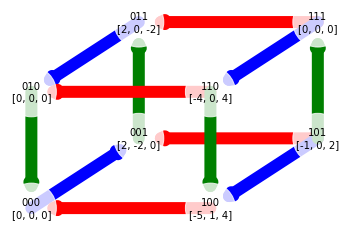

In [9]:
game_settings = {
            "start_populations_matrix": [[4,4],[2,6],[10,0]],
            "topology": "fully_connected",
            'alpha': 1.0,
            'log_level': "error",
        'player_labels':[1,2,3]
        }
game = PolymatrixGame(**game_settings)
for p in [(0, 1, 0),(0, 0, 1), (1, 1, 0), (0, 1, 1)]:
    game.play(p)
    game.solve()
    print(p)
    print(game.state)
    print(game.pne)
    print()

draw_3player_states(game.payoffs, game.pne)

{}


C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


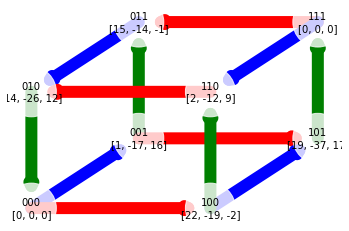

In [16]:
from corpgame import PolymatrixGame
game_settings = {
        "start_populations_matrix": [[1,2],[30,40],[5,6]],
        "topology": "fully_connected",
        'alpha': 1.0,
        'log_level': "error",
    'player_labels':[1,2,3]
    }
game = PolymatrixGame(**game_settings)
game.solve()
print(game.pne)
draw_3player_states(game.payoffs, game.pne)

{}


C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


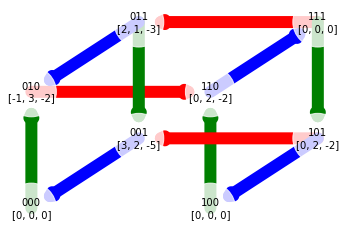

In [3]:
from corpgame import PolymatrixGame
game_settings = {
        "start_populations_matrix": [[6,4],[2,6],[10,6]],
        "topology": "fully_connected",
        'alpha': 1.0,
        'log_level': "error"
    }
game = PolymatrixGame(**game_settings)
game.solve()
print(game.pne)
draw_3player_states(game.payoffs, game.pne)

{'010': [0.0, 0.0, 0.0], '110': [0.0, 0.0, 0.0]}


C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


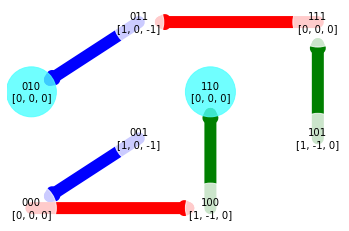

In [13]:
from corpgame import PolymatrixGame
game_settings = {
        "start_populations_matrix": [[6,4],[4,12],[10,6]],
        "topology": "fully_connected",
        'alpha': 0.3,
        'log_level': "error"
    }
game = PolymatrixGame(**game_settings)
game.solve()
print(game.pne)
draw_3player_states(game.payoffs, game.pne)

{'010': [0.0, 0.0, 0.0], '011': [0.0, 0.0, 0.0], '110': [0.0, 0.0, 0.0], '111': [0.0, 0.0, 0.0]}


C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


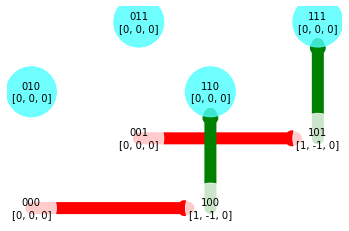

In [14]:
from corpgame import PolymatrixGame
game_settings = {
        "start_populations_matrix": [[6,4],[4,12],[10,6]],
        "topology": [[0,1],[1,2]],
        'alpha': 0.3,
        'log_level': "error"
    }
game = PolymatrixGame(**game_settings)
game.solve()
print(game.pne)
draw_3player_states(game.payoffs, game.pne)